# HW4

<b>9923081 _ 992393 _ 40023024</b><br>

In [406]:
import os
import requests
import numpy as np
import pandas as pd 
from PIL import Image
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_circles
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances

#### k-means clustering 2, 3, 4

generate data sample, calculate the average and initialize centroids randomly

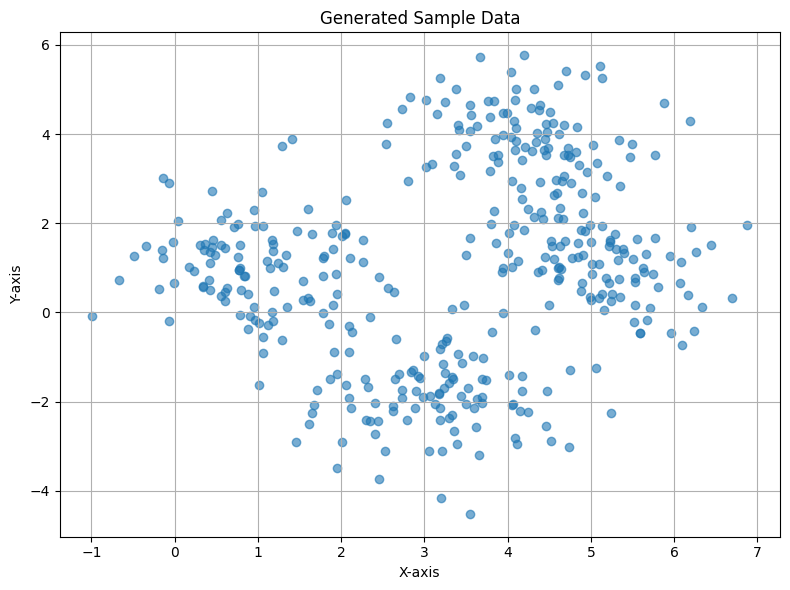

In [407]:
def generate_sample_data():
    nPerClust_SA = 100
    C1 = [1, 1]
    C2 = [5, 1]
    C3 = [3, -2]
    C4 = [4, 4]
    blur = 1
    radius = np.array([0.8, 0.8, 0.8, 0.8])
    C1Data = np.array([C1[0] + radius[0] * np.random.randn(nPerClust_SA) * blur, C1[1] + radius[0] * np.random.randn(nPerClust_SA) * blur])
    C2Data = np.array([C2[0] + radius[1] * np.random.randn(nPerClust_SA) * blur, C2[1] + radius[1] * np.random.randn(nPerClust_SA) * blur])
    C3Data = np.array([C3[0] + radius[2] * np.random.randn(nPerClust_SA) * blur, C3[1] + radius[2] * np.random.randn(nPerClust_SA) * blur])
    C4Data = np.array([C4[0] + radius[3] * np.random.randn(nPerClust_SA) * blur, C4[1] + radius[3] * np.random.randn(nPerClust_SA) * blur])

    np_data = np.hstack((C1Data, C2Data, C3Data, C4Data)).T
    
    return np_data


def plot_data(data):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], alpha=0.6)
    plt.title('Generated Sample Data')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

data = generate_sample_data()
plot_data(data)

def data_mean(data):
    return np.mean(data, axis=0)

def initialize_centroids_random(data, k):
    random_indices = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[random_indices]
    return centroids

K-Means

In [408]:
def kmeans(data, k, max_iter=1000, tol=1e-4, metric='euclidean'):
    # Initialize centroids
    centroids = initialize_centroids_random(data, k)
    
    for _ in range(max_iter):
        # Calculate distances between data points and centroids
        distances = pairwise_distances(data, centroids, metric=metric)
        # Assign each data point to the nearest centroid
        labels = np.argmin(distances, axis=1)
        # Calculate new centroids
        new_centroids = np.array([np.mean(data[labels == i], axis=0) for i in range(k)])
        # convergence
        if np.linalg.norm(centroids - new_centroids) < tol:
            break
        
        centroids = new_centroids
    
    return centroids, labels

Within-Cluster Sum of Squares

In [409]:
def wcss(data, labels, centroids):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        centroid = centroids[i]
        wcss += np.sum(np.linalg.norm(cluster_points - centroid, axis=1) ** 2)
    return wcss

use elbow to perform in a range of k clustering

In [410]:
def elbow_method(data, min_clusters, max_clusters):
    wcss_values = []
    
    for k in range(min_clusters, max_clusters + 1):
        centroids, labels = kmeans(data, k)
        wcss_values.append(wcss(data, labels, centroids))
        visualize_clustering(data, labels, centroids, k)
    
    return wcss_values

visualize the clustering results

In [411]:
def visualize_clustering(data, labels, centroids, k):
    figure = plt.figure()
    colors = ['ro', 'go', 'bo', 'mo', 'yo', 'co', 'ko', 'rs', 'gs', 'bs', 'ms', 'ys', 'cs', 'ks']
    
    for i in range(k):
        plt.plot(data[np.where(labels == i)[0], 0], data[np.where(labels == i)[0], 1], colors[i % len(colors)])
    
    plt.title(f'Clustering with {k} Clusters')
    figure.legend([f"C{i+1}" for i in range(k)], bbox_to_anchor=(1, 1), loc="upper left")
    plt.show()
    
    
def plot_elbow(wcss_values, min_clusters, max_clusters):
    plt.figure()
    plt.plot(range(min_clusters, max_clusters + 1), wcss_values, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.show()

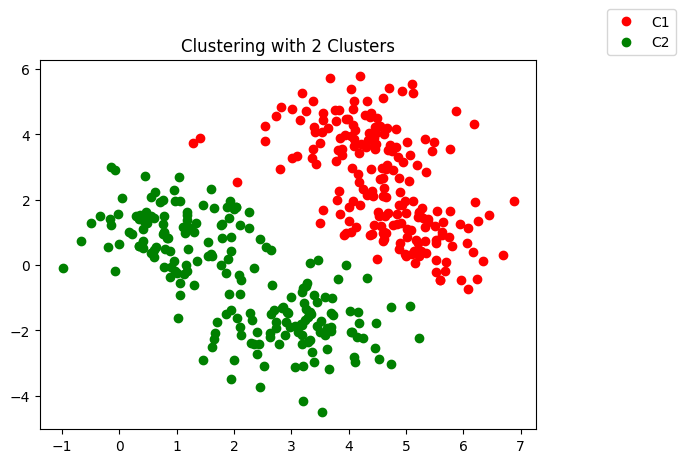

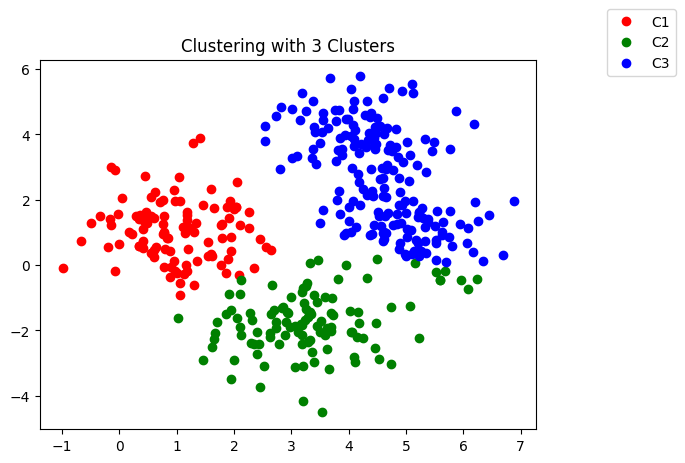

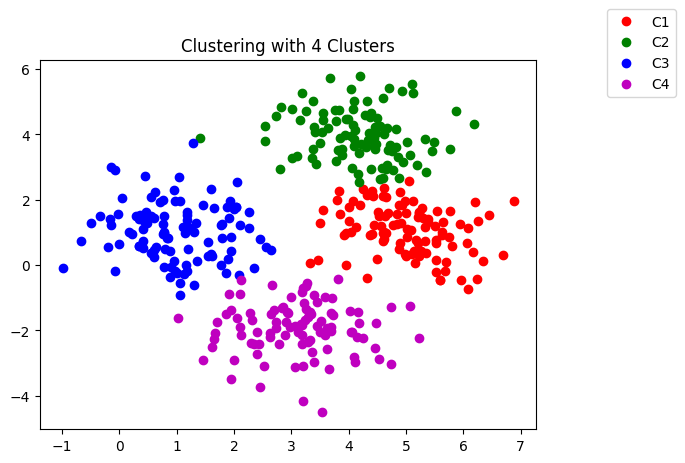

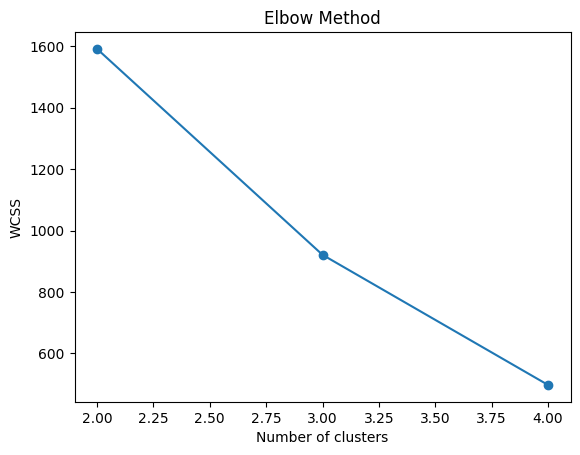

In [412]:
wcss_values = elbow_method(data, 2, 4)

plot_elbow(wcss_values, 2, 4)

in-cluster error

In [413]:
def cluster_error(data,k):
    centroids, labels = kmeans (data, k)
 
    errors = []
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        centroid = centroids[i]
        error = np.mean(np.linalg.norm(cluster_points - centroid, axis=1))
        errors.append(error)
    return errors

average error

In [414]:
def error_error(data,k):
   centroids, labels = kmeans (data, k)
   return np.mean(cluster_error(data,k))

inertia

In [415]:
def inertia(data, k):
    iners = []
    for i in range(2, k + 1):
        centroids, labels = kmeans(data, i)
        error_value = error_error(data, i)
        iners.append(error_value)

    return iners

inertia_values = inertia(data , 4)

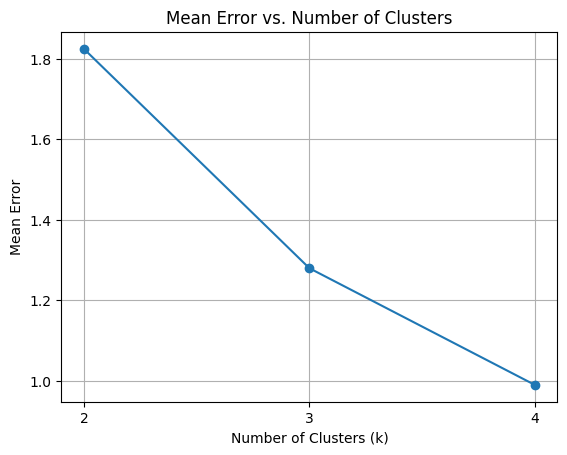

In [416]:
plt.plot(range(2, 5), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Mean Error')
plt.title('Mean Error vs. Number of Clusters')
plt.xticks(range(2, 5))
plt.grid(True)
plt.show()

#### k-means 2-15

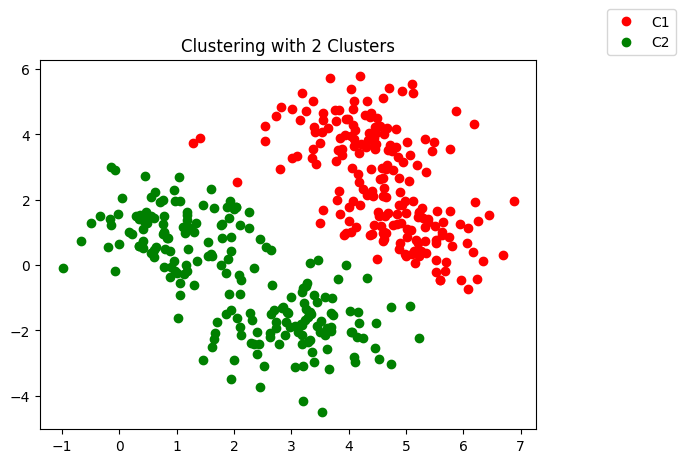

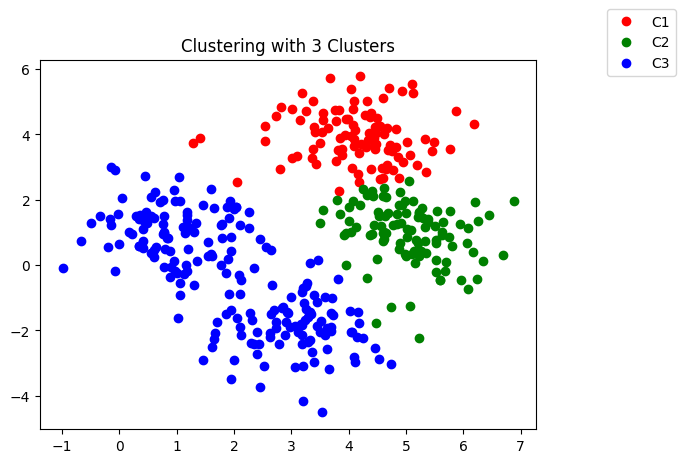

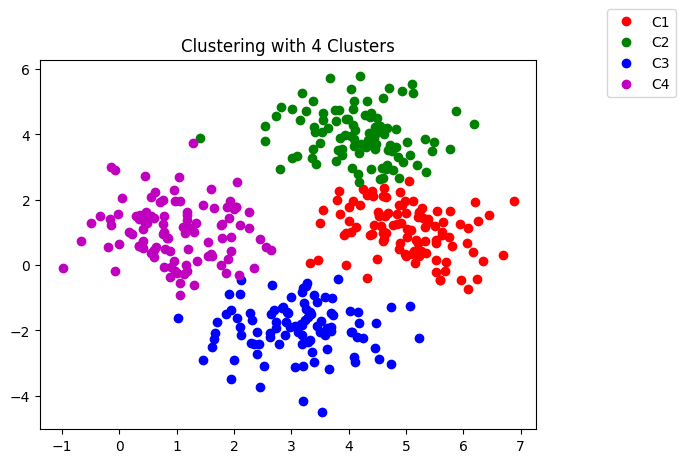

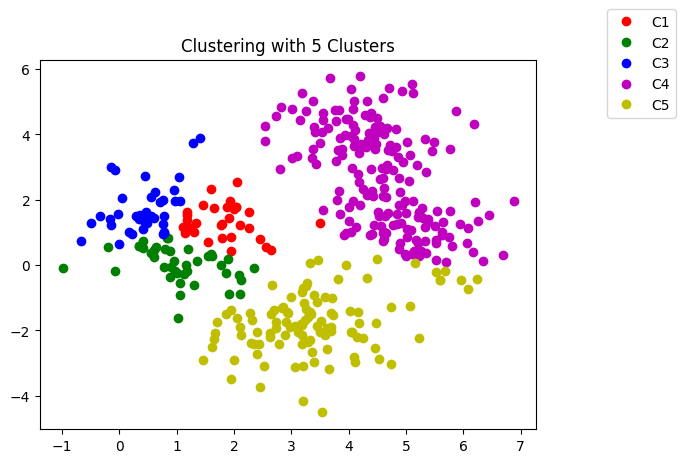

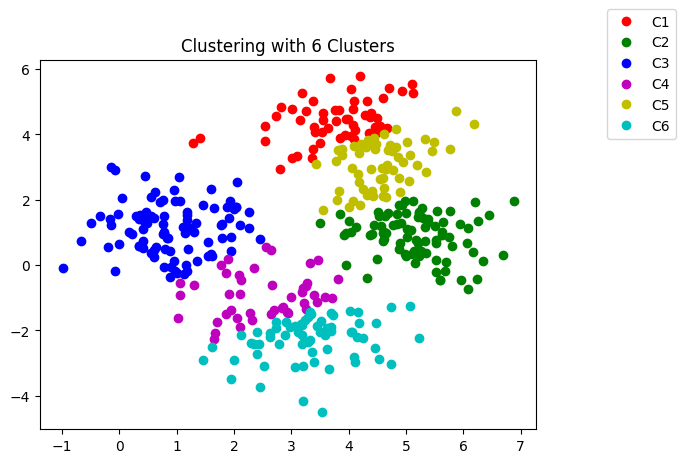

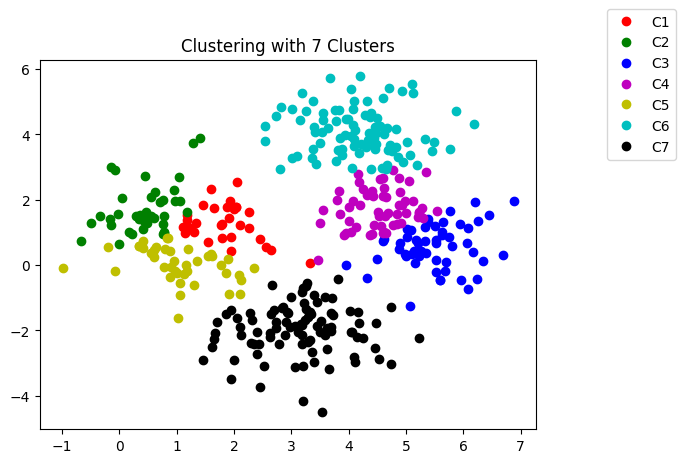

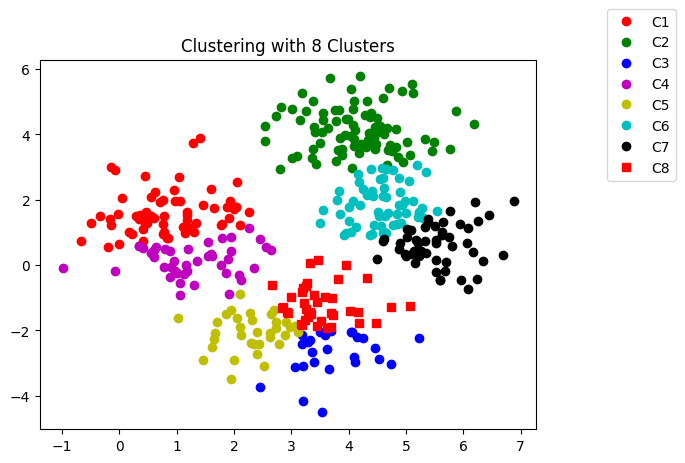

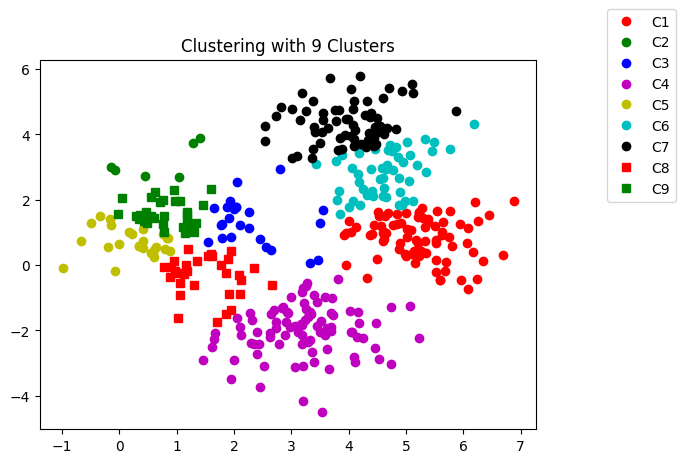

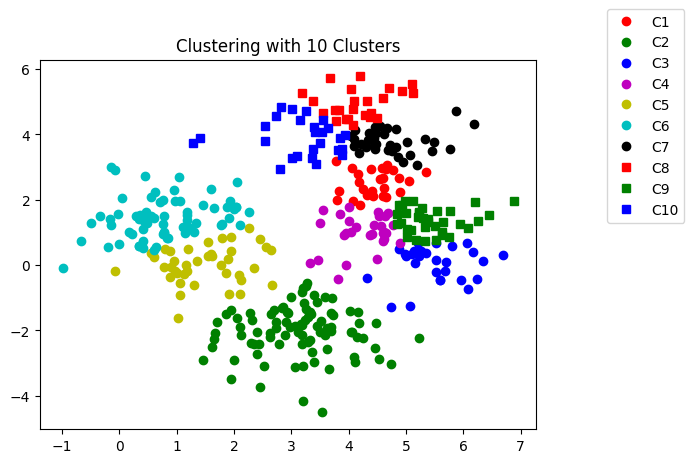

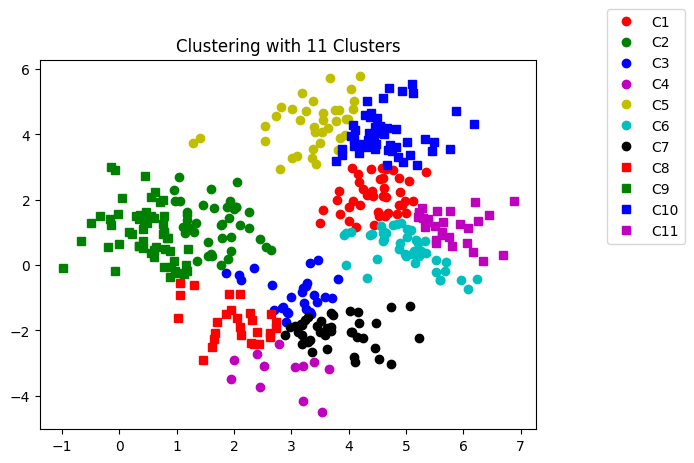

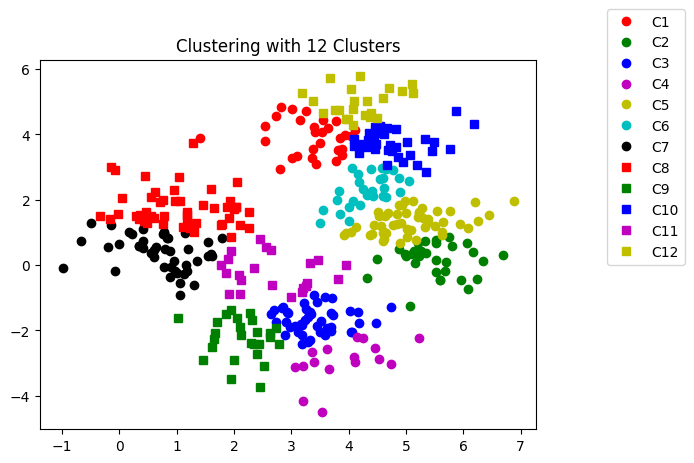

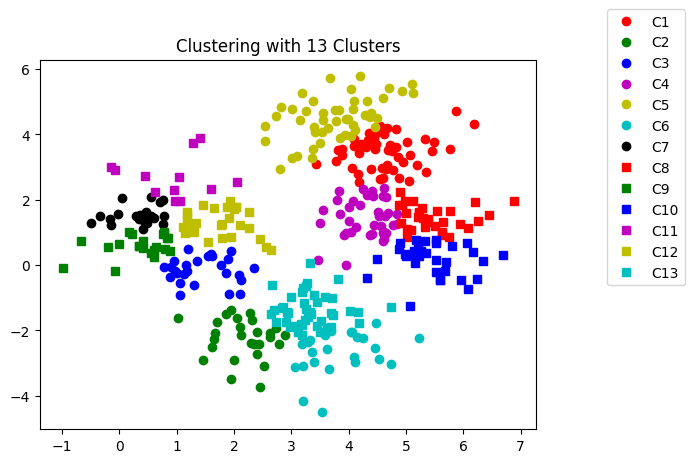

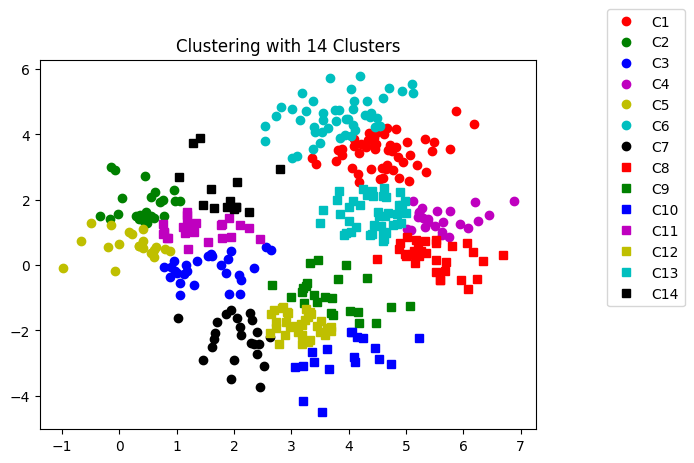

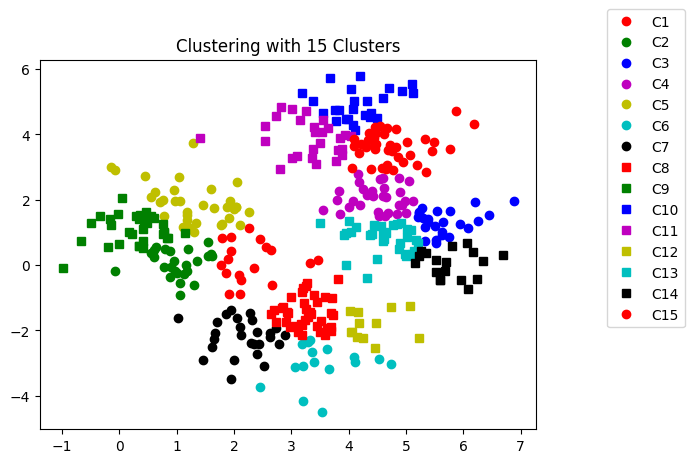

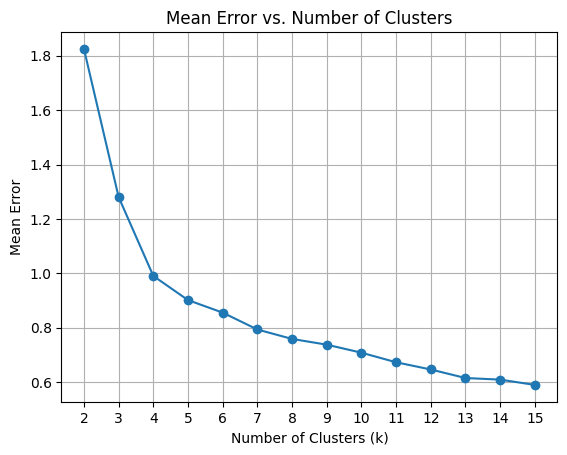

In [417]:
elbow_method(data, 2, 15)

inertia_values = inertia(data , 15)

plt.plot(range(2, 16), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Mean Error')
plt.title('Mean Error vs. Number of Clusters')
plt.xticks(range(2, 16))
plt.grid(True)
plt.show()

#### k-means shortcomings

generate second data sample

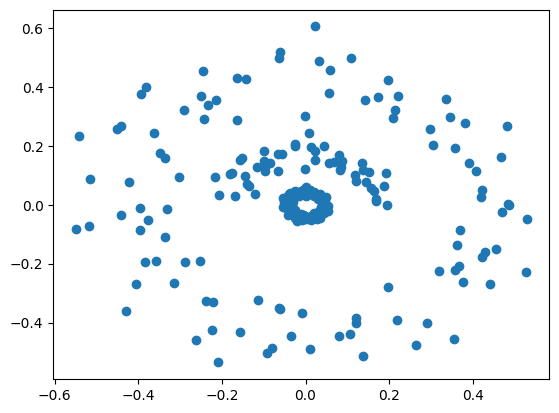

In [418]:
def generate_circle_data():
    x,_ = make_circles(n_samples=100,noise=0.1,shuffle=False)
    x1 = 0.5* x
    x2 = 0.2* x[x[:,1]>0,:]
    x3 = 0.05*x 

    Data = np.vstack((x1,x2,x3))
    return Data


plt.scatter(Data[:,0],Data[:,1])
plt.show()

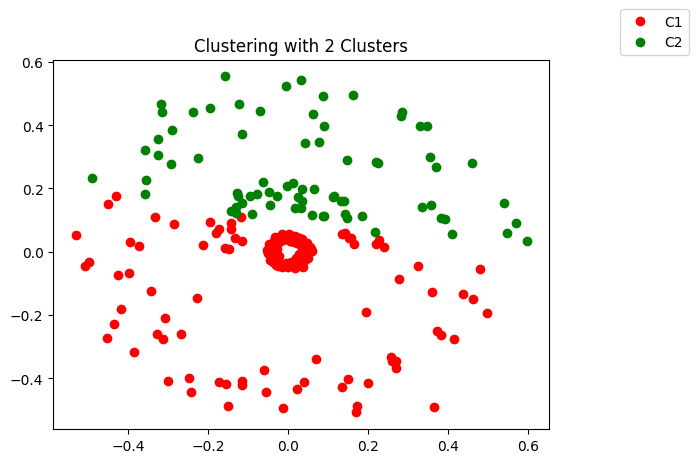

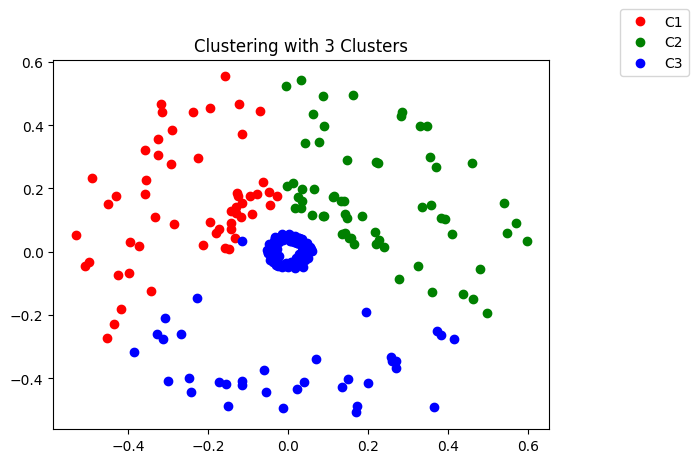

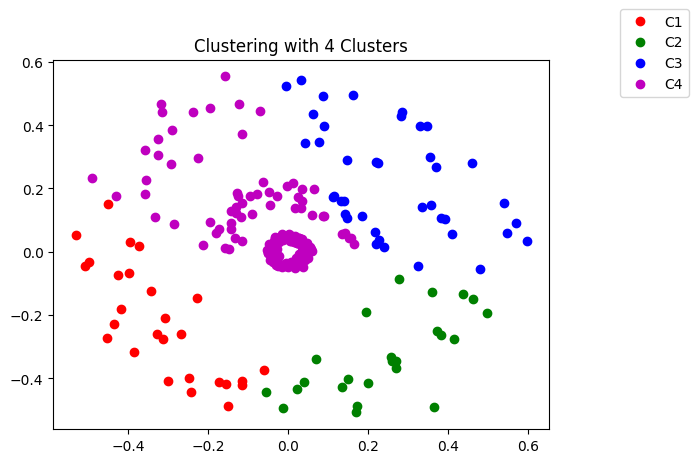

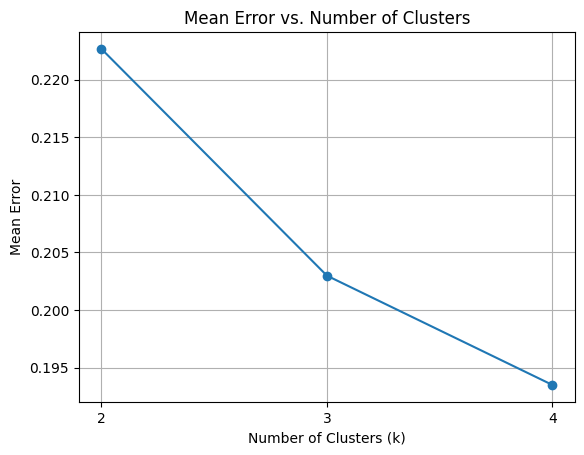

In [419]:
data2 = generate_circle_data()

elbow_method(data2, 2, 4)

inertia_values = inertia(data2, 4)

plt.plot(range(2, 5), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Mean Error')
plt.title('Mean Error vs. Number of Clusters')
plt.xticks(range(2, 5))
plt.grid(True)
plt.show()

#### sklearn's KMeans

In [420]:
class MeanKCluster:
    def __init__(self, n_clusters=8, init='k-means++', n_init=10, max_iter=300,
                 tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd'):
        # Initialize hyperparameters
        self.n_clusters = n_clusters
        self.init = init
        self.n_init = n_init  # Set this to a valid integer
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.random_state = random_state
        self.copy_x = copy_x
        self.algorithm = algorithm
        
        # Create KMeans model
        self.model = KMeans(n_clusters=self.n_clusters,
                             init=self.init,
                             n_init=self.n_init,
                             max_iter=self.max_iter,
                             tol=self.tol,
                             verbose=self.verbose,
                             random_state=self.random_state,
                             copy_x=self.copy_x,
                             algorithm=self.algorithm)

    def fit(self, data):
        # Fit the model to the data
        self.model.fit(data)
        self.labels = self.model.labels_
        self.centroids = self.model.cluster_centers_
        return self.labels, self.centroids

    def score(self, data):
        # Calculate silhouette score as a measure of clustering performance
        return silhouette_score(data, self.labels)

    def plot_clusters(self, data):
        # Visualize the clustering results
        plt.figure(figsize=(8, 6))
        colors = plt.cm.hsv(np.linspace(0, 1, self.n_clusters))  # Updated line

        for i in range(self.n_clusters):
            plt.scatter(data[self.labels == i, 0], data[self.labels == i, 1], 
                        color=colors[i], alpha=0.6, label=f'Cluster {i + 1}')

        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], 
                    color='black', marker='X', s=100, label='Centroids')
        
        plt.title('Clustering Results')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.grid()
        plt.show()

Silhouette Score 1: 0.55


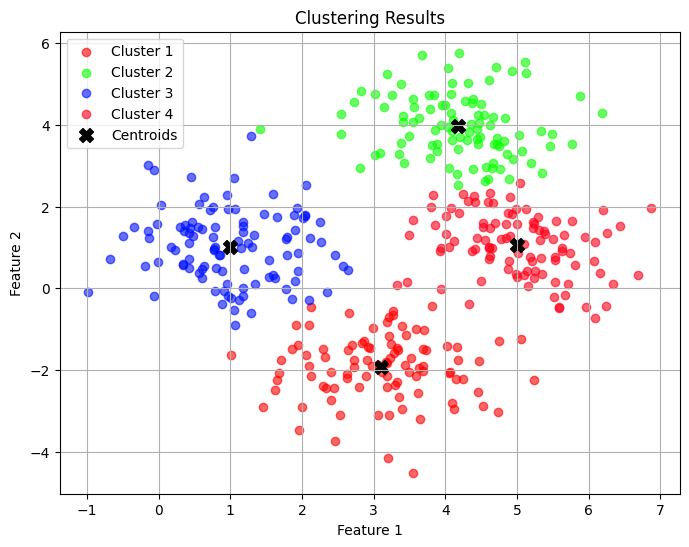

Silhouette Score 2: 0.47


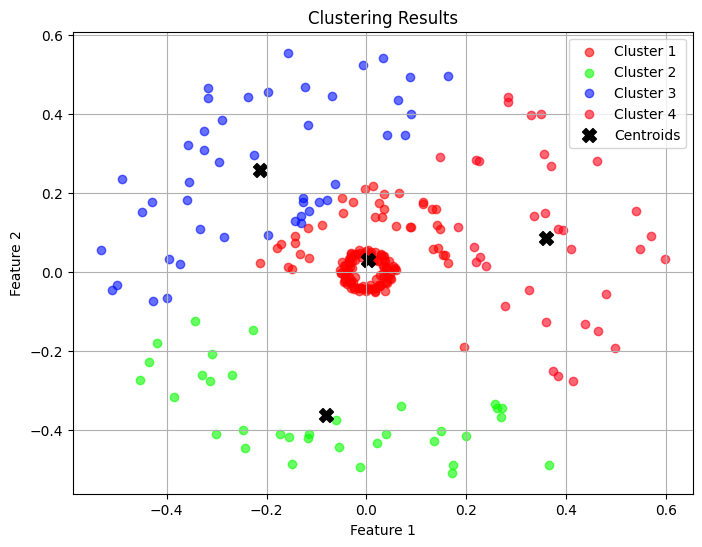

In [421]:
mean_k_cluster = MeanKCluster(n_clusters=4)

labels, centroids = mean_k_cluster.fit(data)

score = mean_k_cluster.score(data)
print(f'Silhouette Score 1: {score:.2f}')

mean_k_cluster.plot_clusters(data)

labels2, centroids2 = mean_k_cluster.fit(data2)

score = mean_k_cluster.score(data2)
print(f'Silhouette Score 2: {score:.2f}')

mean_k_cluster.plot_clusters(data2)

#### image compression

load and reshape image

In [422]:
image = Image.open('OwlPic.jpg')
image = image.convert("RGB")
image_np = np.array(image)

pixels = image_np.reshape(-1, 3)  # Reshape to (num_pixels, 3)

K-Means clustering

In [423]:
n_colors = 16  # Number of clusters
kmeans = KMeans(n_clusters=n_colors, random_state=0, n_init=10, max_iter=300)
kmeans.fit(pixels)

compressed_colors = kmeans.cluster_centers_.astype('uint8')
labels = kmeans.labels_

replace each pixel value with its corresponding cluster center

In [424]:
compressed_image_array = compressed_colors[labels].reshape(image_np.shape)

compressed_image = Image.fromarray(compressed_image_array)

compressed_image.save("OwlPic_compressed.jpg", "JPEG")

original_size = os.path.getsize('OwlPic.jpg')
compressed_size = os.path.getsize('OwlPic_compressed.jpg')
print(f"Original size: {original_size / 1024:.2f} kB, Compressed size: {compressed_size / 1024:.2f} kB")

Original size: 303.80 kB, Compressed size: 326.75 kB


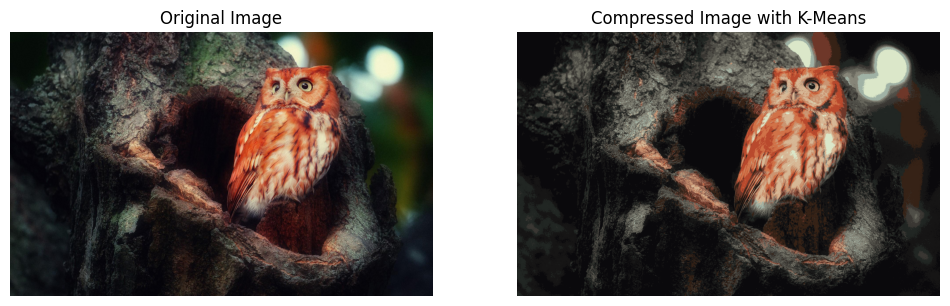

In [425]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Compressed Image with K-Means')
plt.imshow(compressed_image)
plt.axis('off')

plt.show()

#### Q5

In [426]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [427]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [428]:
data.drop('CustomerID',axis=1,inplace=True)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


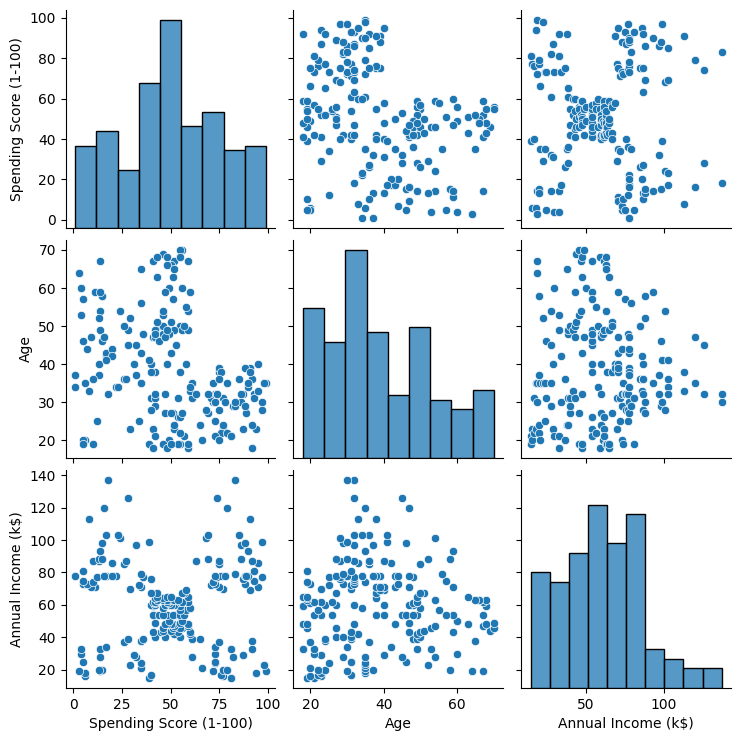

In [429]:
sns.pairplot(data[['Spending Score (1-100)', 'Age', 'Annual Income (k$)']])
plt.show()

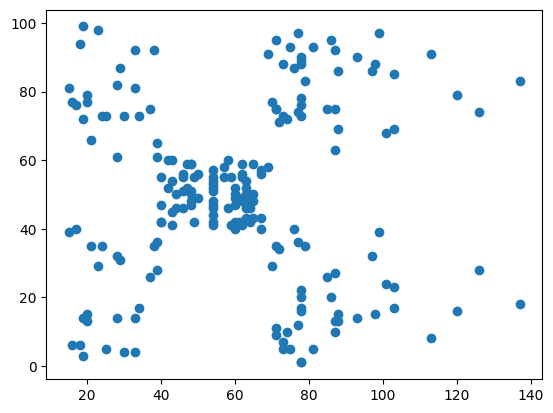

In [430]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)']) 
plt.show()

In [431]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [432]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [433]:
f_data= data.iloc[:, [2,3]].values

In [434]:
#finding best value for K
ilist=[]
n=11
for i in range(1,n):
    km=KMeans(n_clusters=i)
    km.fit_predict(f_data)
    ilist.append(km.inertia_)

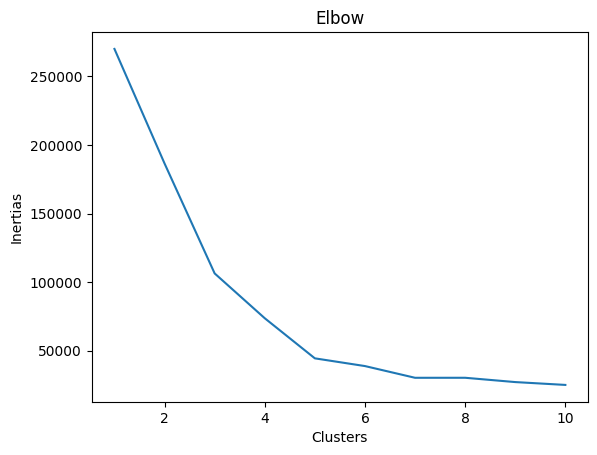

In [435]:
plt.plot(range(1,n),ilist)
plt.title("Elbow")
plt.xlabel("Clusters")
plt.ylabel('Inertias')
plt.show()

As we can see best number of clusters would be 5

In [436]:
km=KMeans(n_clusters=5)
y_pred=km.fit_predict(f_data)
y_pred, y_pred.dtype

(array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
        3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
        3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
        1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
        2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
        2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
        2, 0]),
 dtype('int32'))

In [437]:
data['Cluster']=y_pred
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,2
197,Male,32,126,74,0
198,Male,32,137,18,2


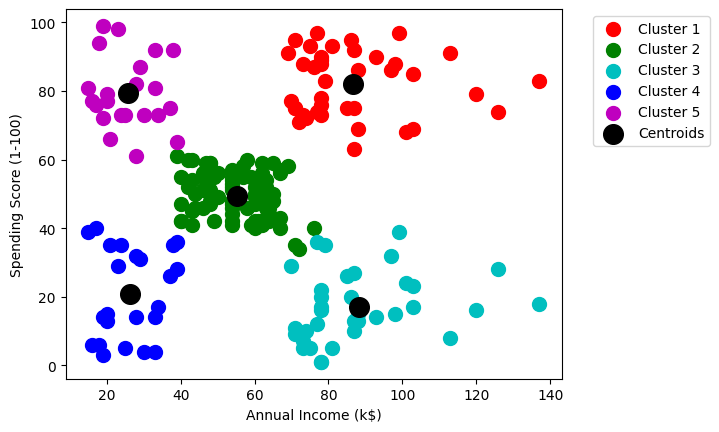

In [438]:
plt.scatter(f_data[y_pred == 0,0],f_data[y_pred == 0,1] ,label='Cluster 1',c='r',s=100)
plt.scatter(f_data[y_pred == 1,0],f_data[y_pred == 1,1] ,label='Cluster 2',c='g',s=100)
plt.scatter(f_data[y_pred == 2,0],f_data[y_pred == 2,1] ,label='Cluster 3',c='c',s=100)
plt.scatter(f_data[y_pred == 3,0],f_data[y_pred == 3,1] ,label='Cluster 4',c='b',s=100)
plt.scatter(f_data[y_pred == 4,0],f_data[y_pred == 4,1] ,label='Cluster 5',c='m',s=100)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],label='Centroids',c="k",s=200)

plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()